# HW03: due October th 

The goal of this homework is to **predict** the value of houses in California starting from house and neighborhood caracteristics. 

Differently from last week's homework, we are not interested in investigating the causal effect of some features on house values, but the main purpose is to obtain good predictions of the values, so to train the best model to minimize the loss function. 

In [39]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)
# Load Data
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [40]:
X_full, y_full = data.data, data.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]
print(n_samples,n_features)

20640 8


In [41]:
X_df=pd.DataFrame(X_full, columns=data['feature_names'])
X_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# Summary Statistics

In [42]:
from seaborn import distplot
# make a histogram of the label variable
#TODO
y_full.shape

(20640,)

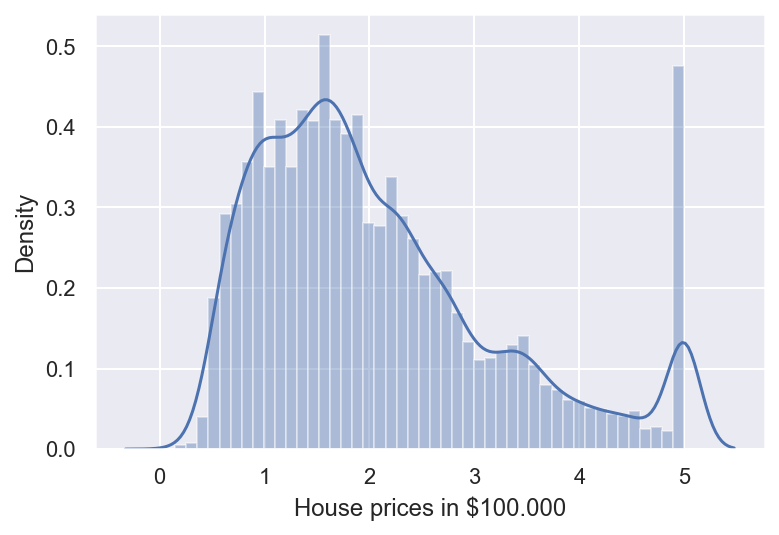

In [43]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
#plt.hist(y_full, bins=30)
#plt.xlabel("House prices in $100.000", size=15)
#plt.ylabel('count', size=15)
#plt.title('Distribution of house prices in California', size=20)
#plt.show()
sns.set_theme(); np.random.seed(0)
y_full = pd.Series(y_full, name="House prices in $100.000")
ax = sns.distplot(y_full)

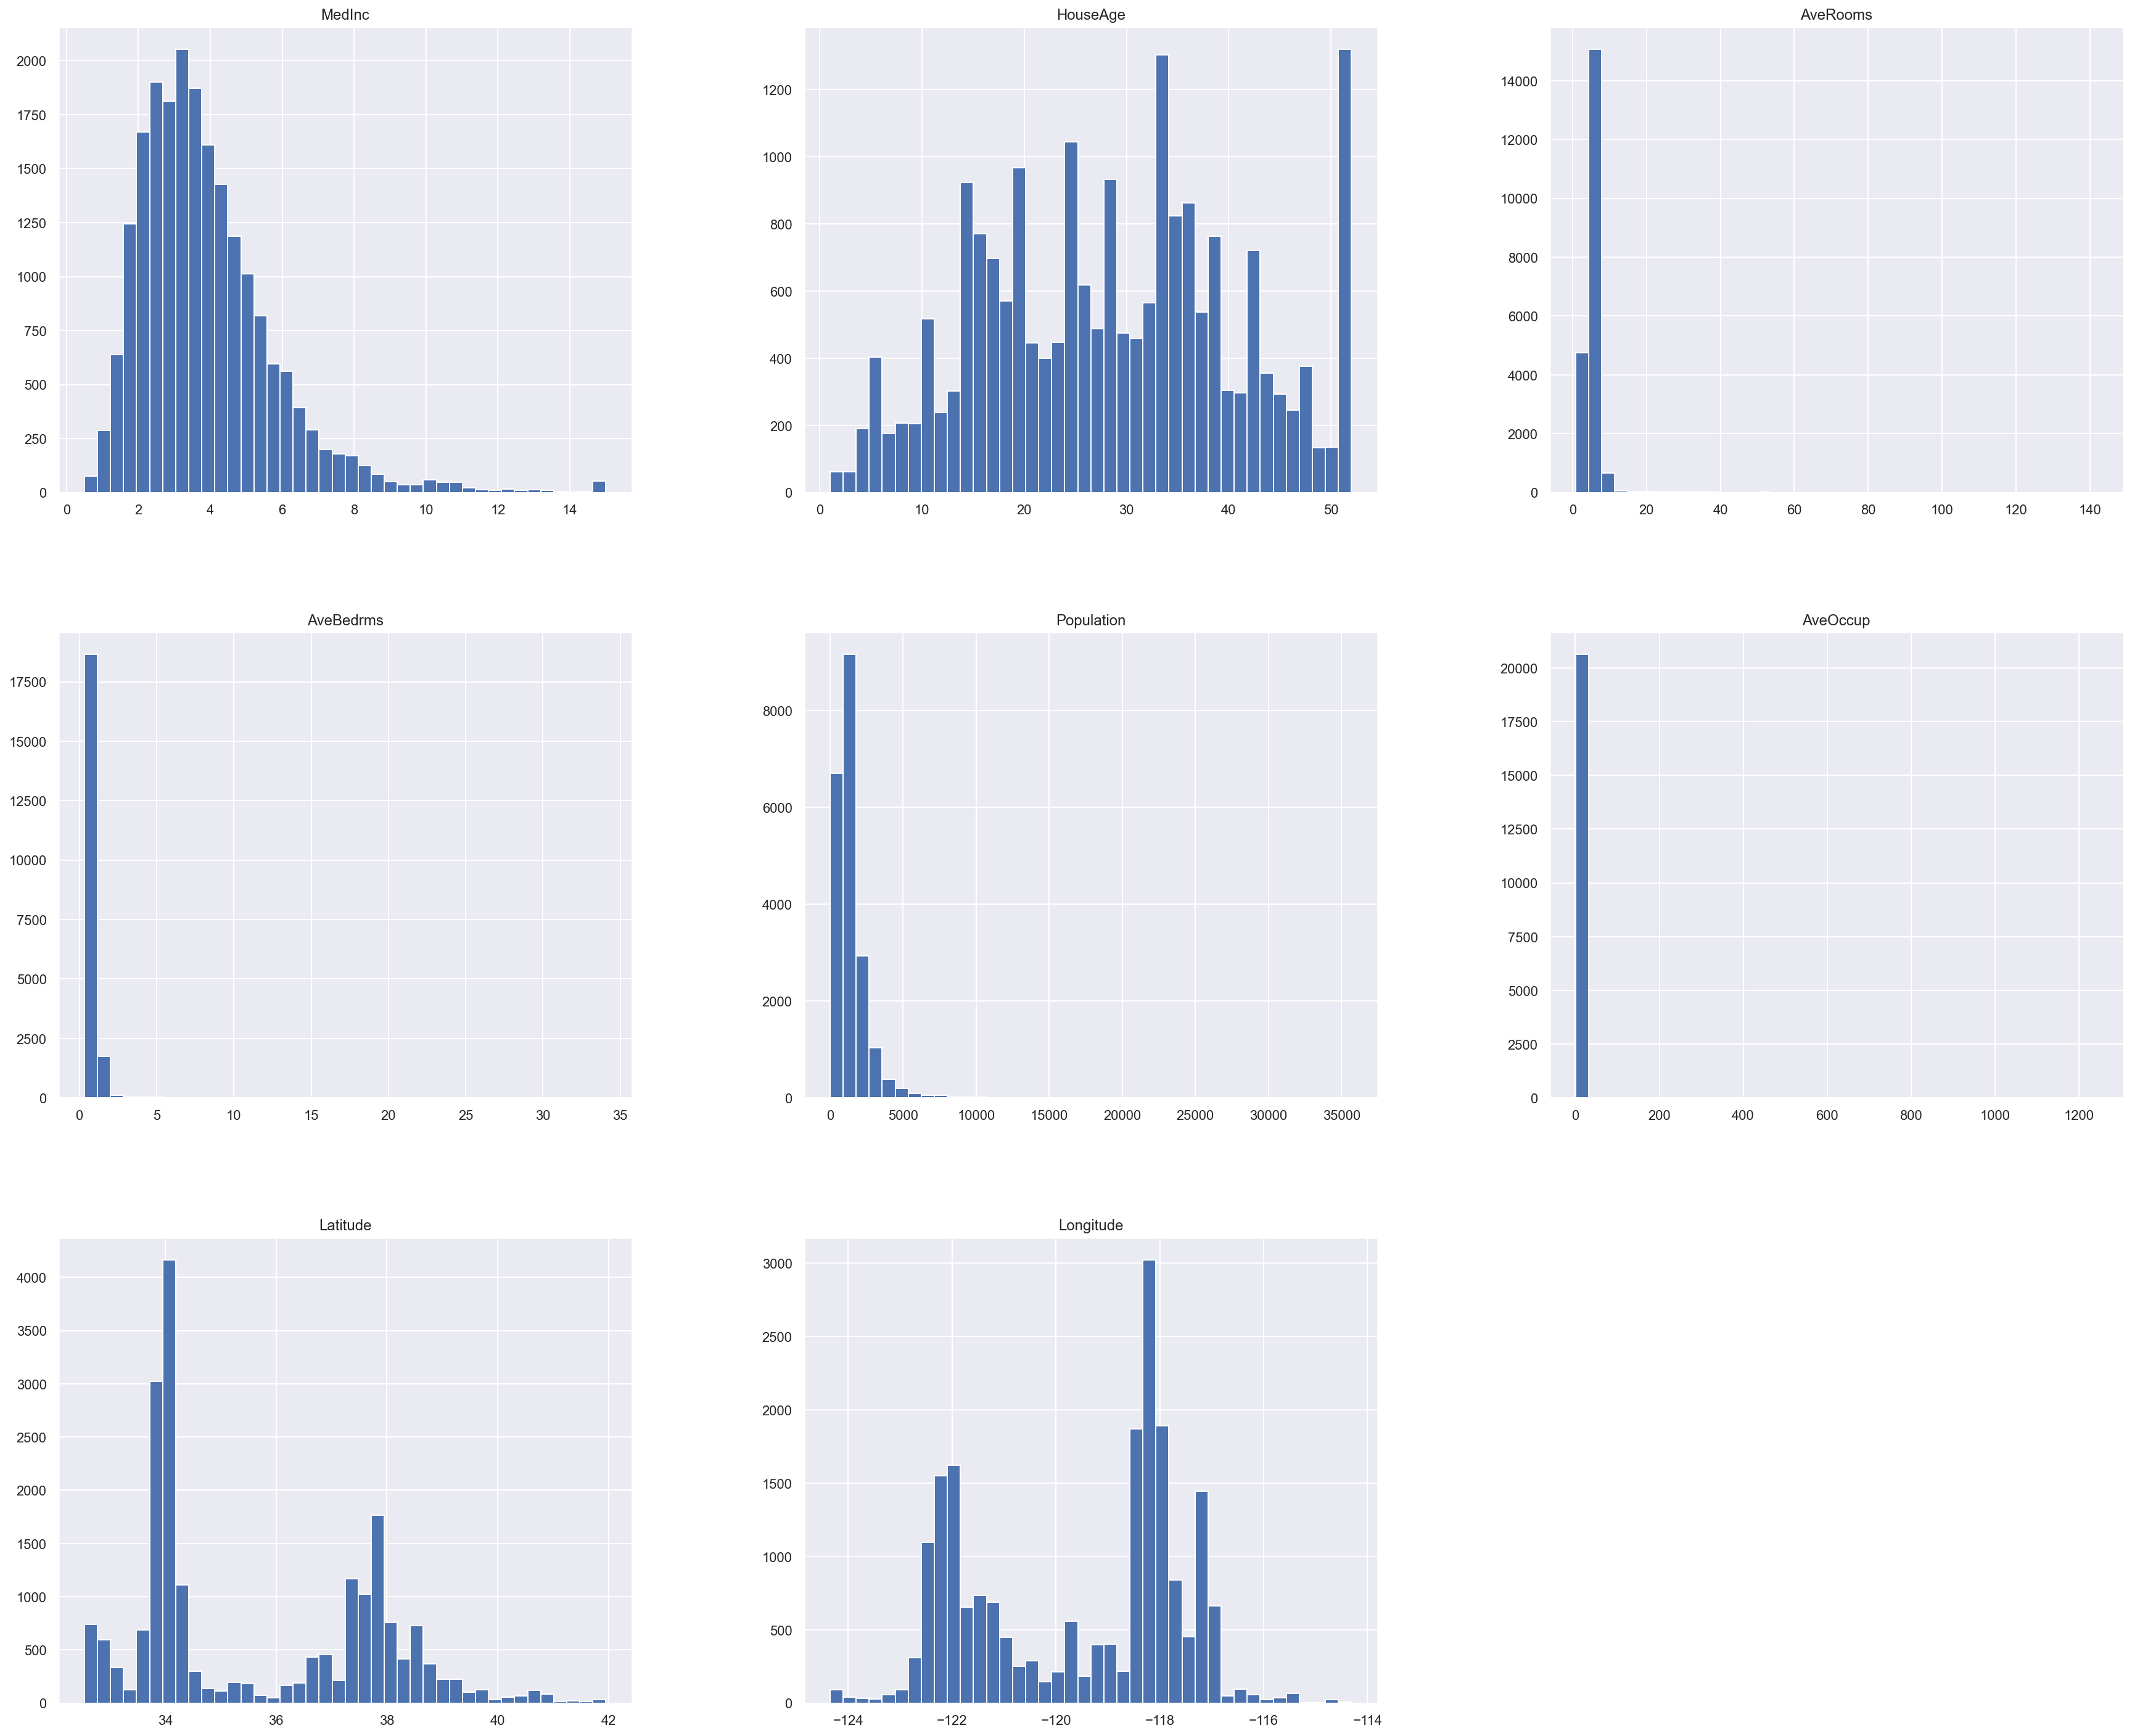

In [44]:
# make histograms of all predictors
#TODO
X_df.hist(bins=40, figsize=(30,25))
plt.show()

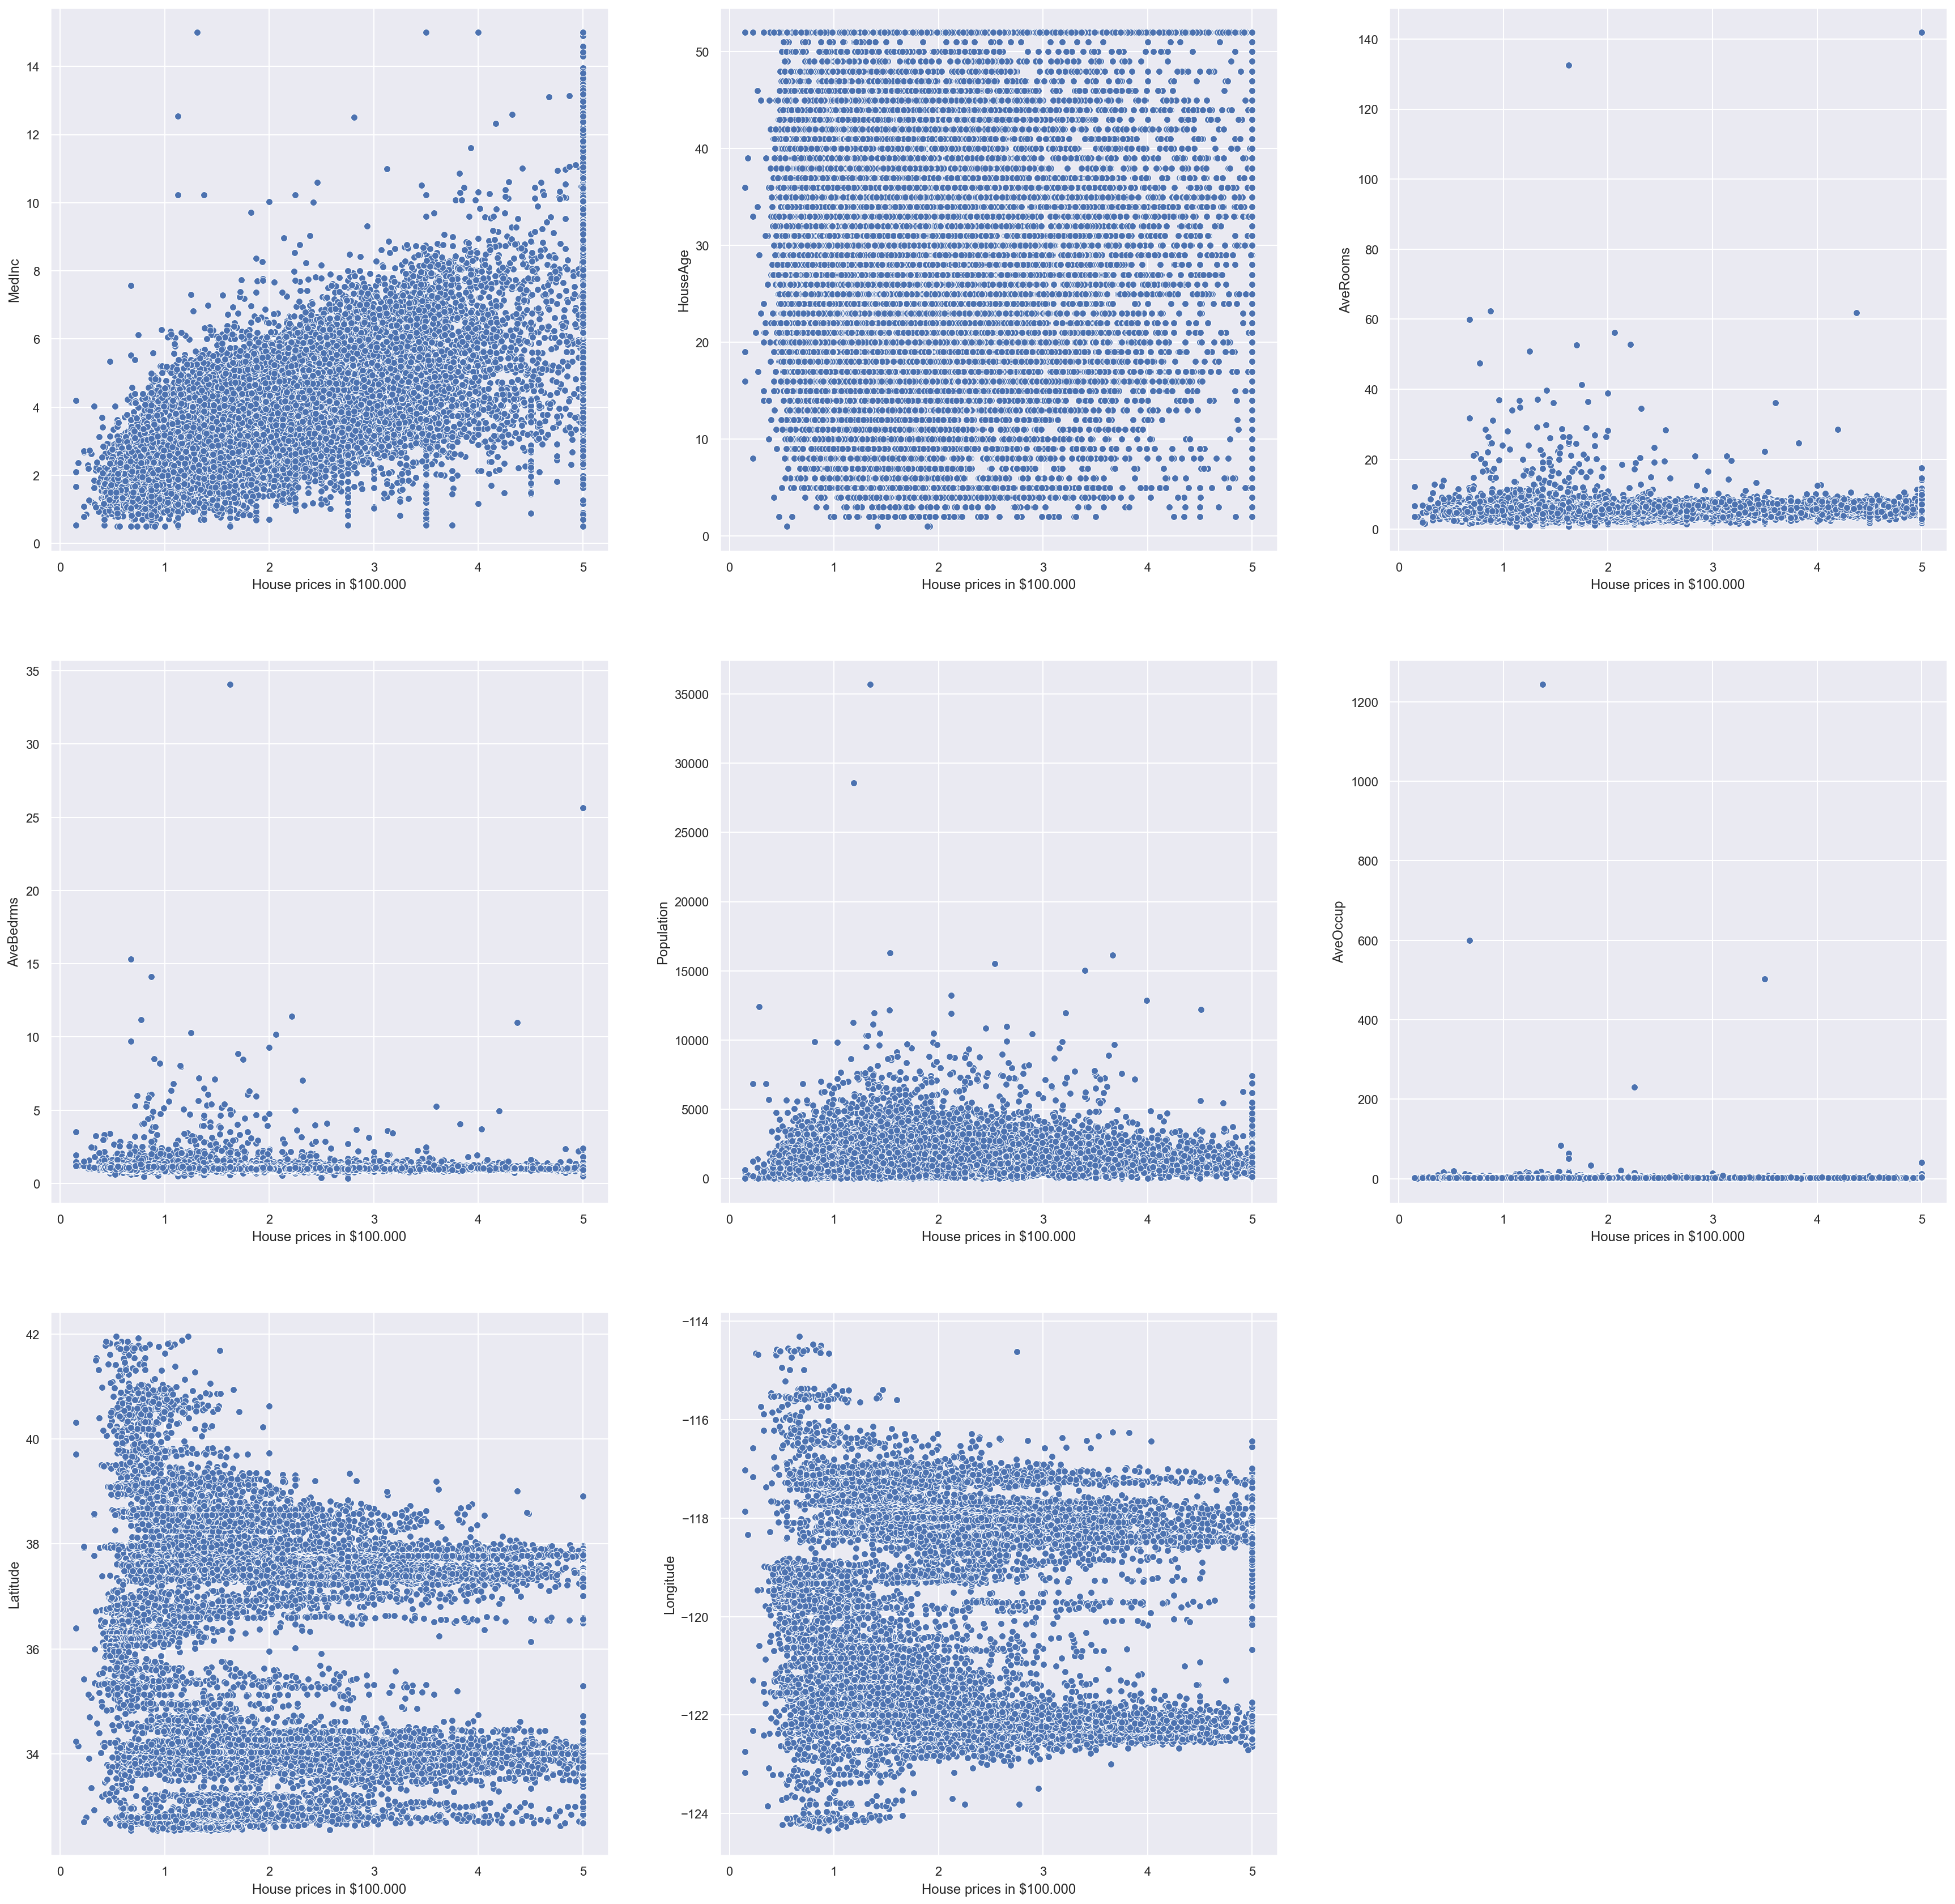

In [45]:
from seaborn import scatterplot
# make scatterplots of all predictors with the label
#TODO
#fig, ax = plt.subplots(3, 3, figsize=(30,30))
#axe = ax.ravel()
#axe[0].set_xticklabels([])
#axe[0].set_xlabel(' ')
#for i, feature_name in zip(range(0,8), X_df.columns):
#    axe[i+1].scatter(y_full, X_df[feature_name], alpha=0.1)
#    axe[i+1].set_xlabel('Price')
#    axe[i+1].set_ylabel(feature_name)

count=1
plt.subplots(figsize=(30, 30))
for i in X_df.columns:
    plt.subplot(3,3,count)
    sns.scatterplot(y_full,X_df[i])
    count+=1
plt.show()

# Train/Test Split

In [46]:
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,test_size=0.2, random_state=1)
#TODO
print("train data", X_train.shape, y_train.shape)
print("test data", X_test.shape,  y_test.shape)

train data (16512, 8) (16512,)
test data (4128, 8) (4128,)


# Pre-Processing

In [47]:
from sklearn.preprocessing import StandardScaler
# produce standardized predictors with mean zero and variance one 
# fit the transformer in the training set and apply to the whole data
#TODO
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) # can add with_mean=False to not take out mean
X_test_scaled = scaler.transform(X_test)

In [48]:
from sklearn.preprocessing import PolynomialFeatures
# produce quadratic polynomial features from all standardized predictors
# squared values and pairwise interactions 
# fit the transformer in the training set and apply to the whole data
#TODO
poly_features=PolynomialFeatures(degree=2)
X_train_poly=poly_features.fit_transform(X_train)
X_test_poly=poly_features.fit_transform(X_test)
#X_train_poly

## Fractional Ridge Regression
https://arxiv.org/abs/2005.03220

https://nrdg.github.io/fracridge/

In [52]:
#!conda install fracridge
print("I installed it manually through the command prompt")

I installed it manually through the command prompt


In [53]:
from fracridge import FracRidgeRegressorCV
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# train fractional ridge on raw predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 
#TODO
fridge_reg = FracRidgeRegressorCV()      
fridge_reg.fit(X_train, y_train)

y_train_pred = fridge_reg.predict(X_train)
y_test_pred = fridge_reg.predict(X_test)        
test_mse_fr = mean_squared_error(y_test, y_test_pred)
test_rmse_fr = np.sqrt(test_mse_fr)
print("Best fraction penalty: %s" % fridge_reg.best_frac_)
print("test RMS_fr: %s" % test_rmse_fr )
#print("train R2_fr: %s" % round(r2_score(y_train, y_train_pred), 2)) 
r2 = round(r2_score(y_test, y_test_pred), 2)
print("test R2_fr: %s" % round(r2_score(y_test, y_test_pred), 2)) 

Best fraction penalty: 0.9
test RMS_fr: 0.7756458282129098
test R2_fr: 0.54


In [55]:
# train fractional ridge on stanardized predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 
#TODO
fridge_reg = FracRidgeRegressorCV()      
fridge_reg.fit(X_train_scaled, y_train)

y_train_pred_scaled = fridge_reg.predict(X_train_scaled)
y_test_pred_scaled = fridge_reg.predict(X_test_scaled)        
test_mse_fr = mean_squared_error(y_test, y_test_pred_scaled)
test_rmse_fr = np.sqrt(test_mse_fr)
print("Best fraction penalty: %s" % fridge_reg.best_frac_)
print("test RMS_fr: %s" % test_rmse_fr )
#print("train R2_fr: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2_fr: %s" % round(r2_score(y_test, y_test_pred_scaled), 2)) 

Best fraction penalty: 1.0
test RMS_fr: 2.180381093112507
test R2_fr: -2.62


In [56]:
# train fractional ridge on standardized predictors including quadratics and interactions
# report the chosen fraction penalty
# report MSE and r-squared in test set 
#TODO
fridge_reg = FracRidgeRegressorCV()      
fridge_reg.fit(X_train_poly, y_train)

y_train_pred_poly = fridge_reg.predict(X_train_poly)
y_test_pred_poly = fridge_reg.predict(X_test_poly)        
test_mse_fr = mean_squared_error(y_test, y_test_pred_poly)
test_rmse_fr = np.sqrt(test_mse_fr)
print("Best fraction penalty: %s" % fridge_reg.best_frac_)
print("test RMS_fr: %s" % test_rmse_fr )
#print("train R2_fr: %s" % round(r2_score(y_train, y_train_pred), 2)) 
print("test R2_fr: %s" % round(r2_score(y_test, y_test_pred_poly), 2)) 

Best fraction penalty: 0.30000000000000004
test RMS_fr: 0.6702191834992878
test R2_fr: 0.66


In [57]:
from seaborn import regplot

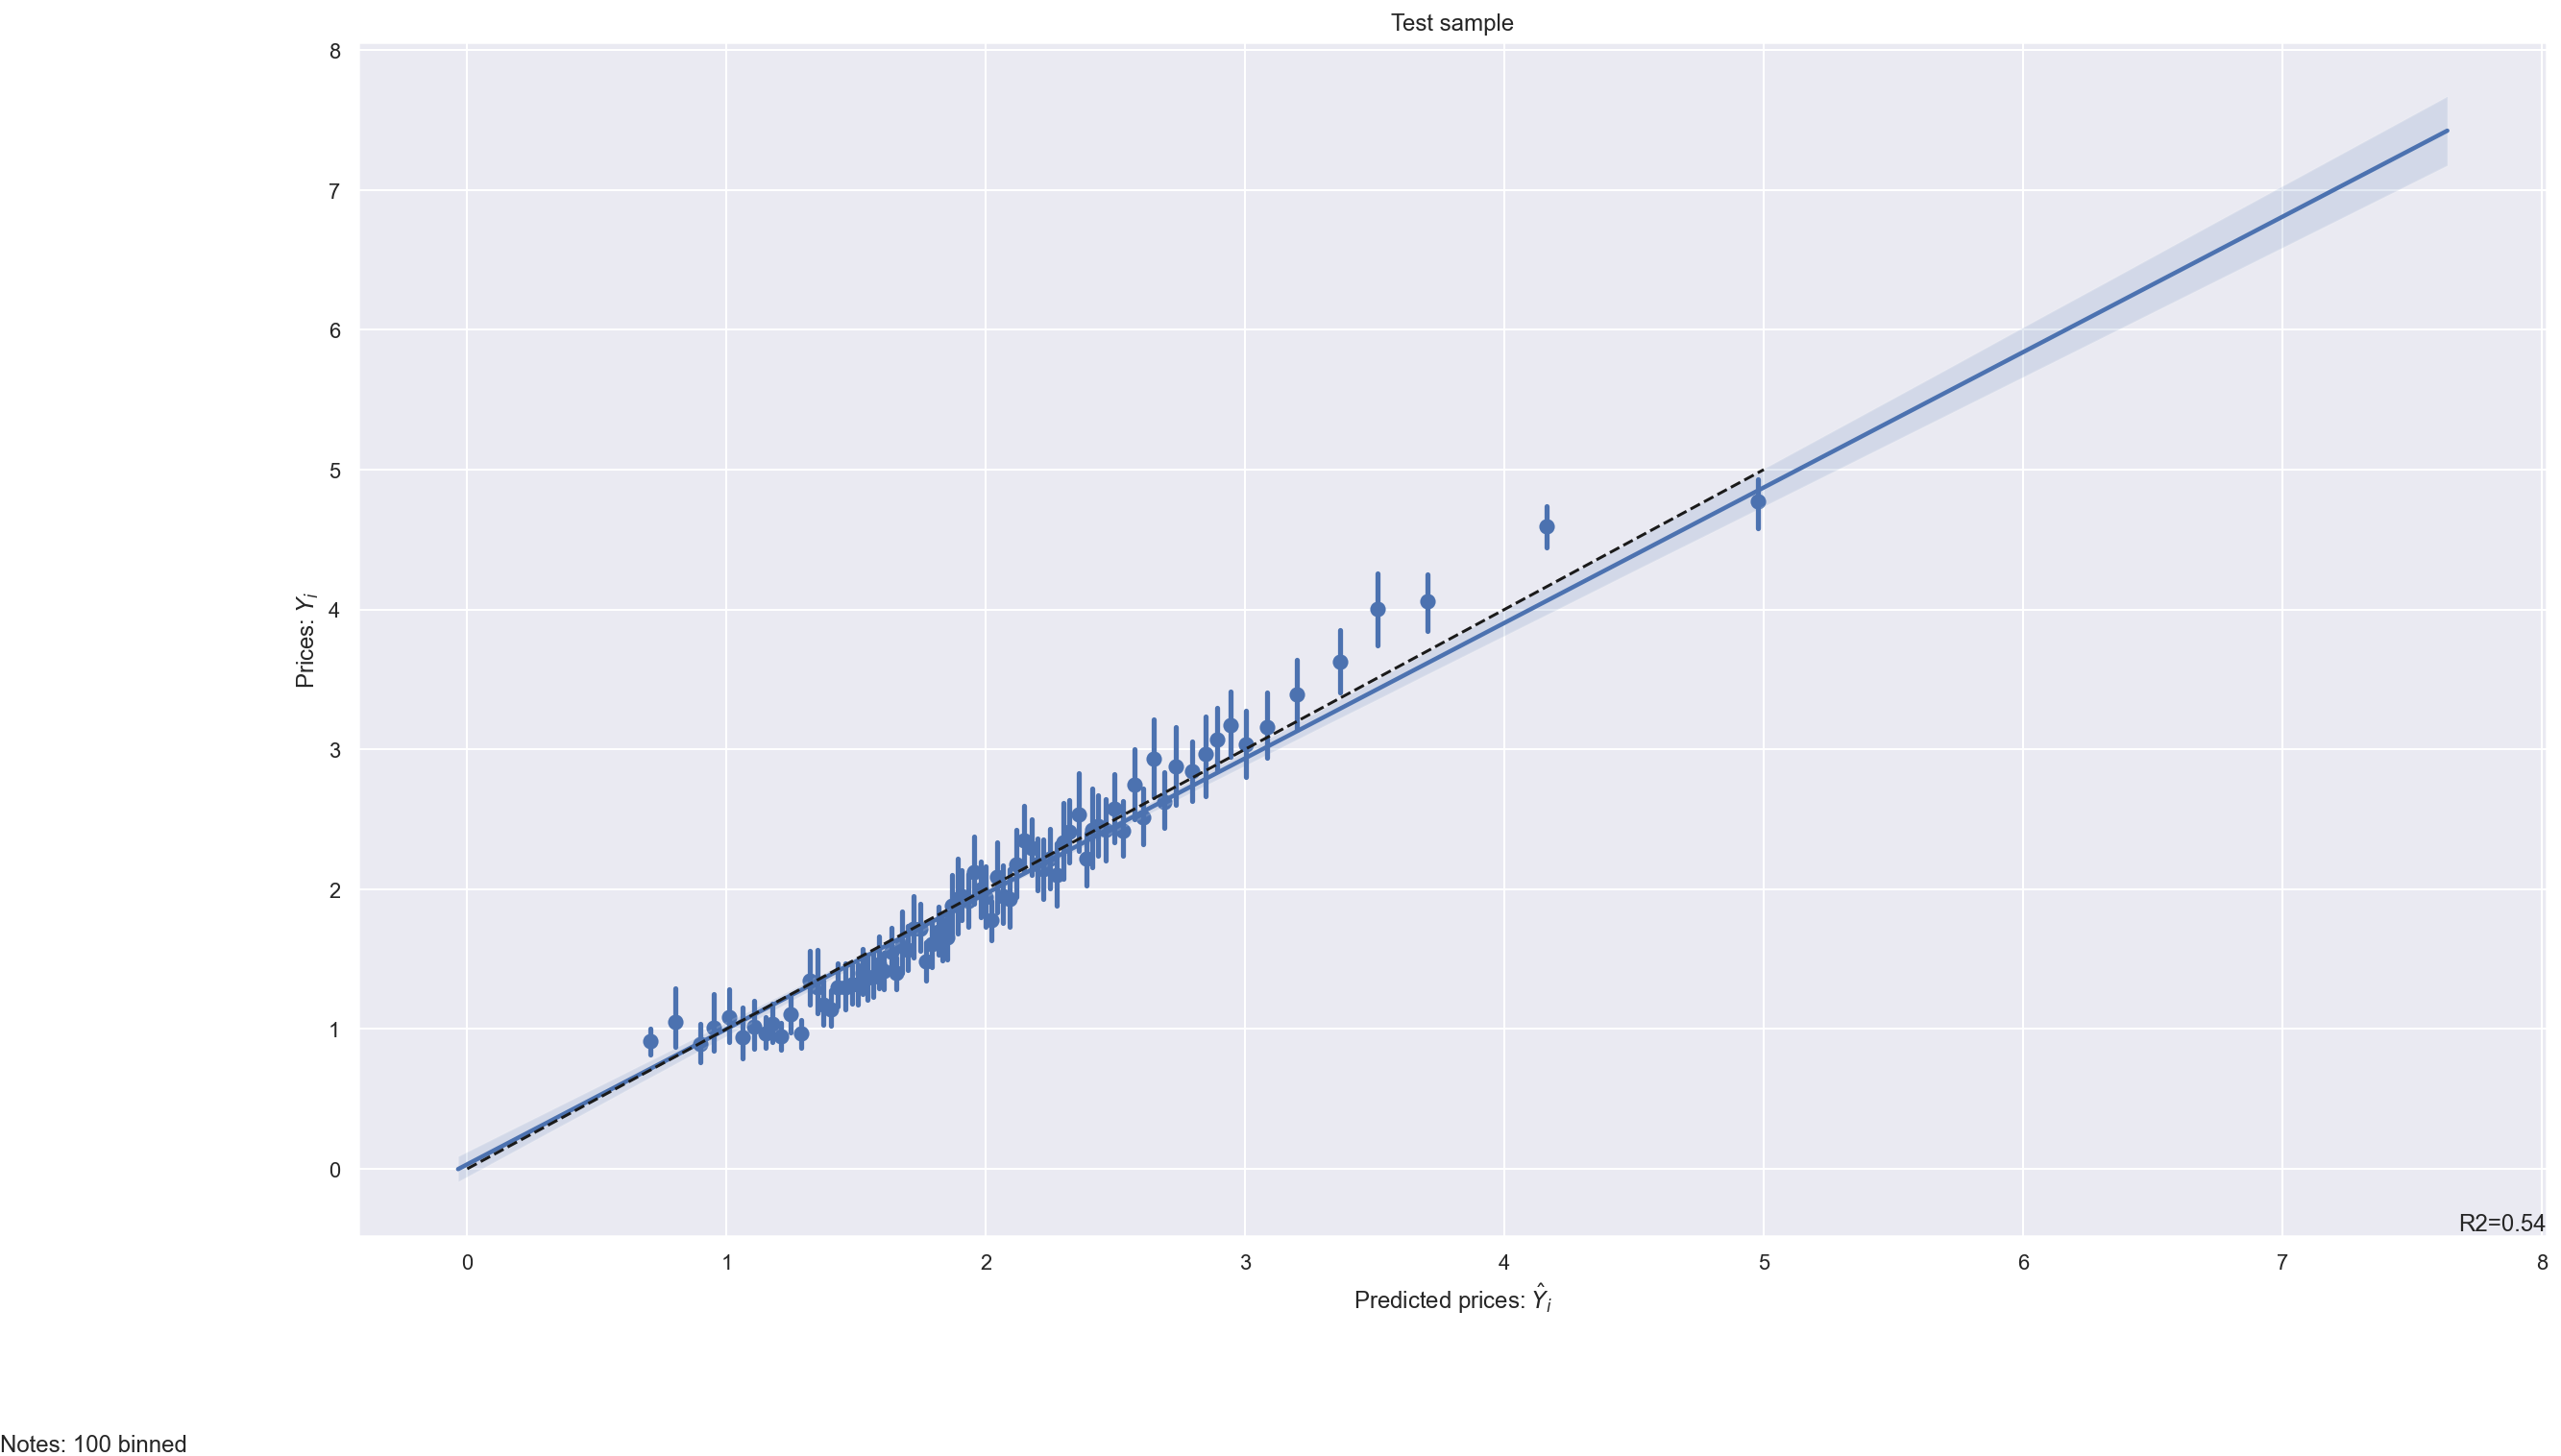

In [64]:
# report a binned regplot of the true outcome versus predictions in the test set
g=sns.regplot(x= y_test_pred, y=y_test, x_bins = 80)
g=g.set_title("Test sample")
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.ylabel("Prices: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
g.figure.set_size_inches(18.5, 10.5)
plt.tight_layout()
plt.show(g)

**How do the results change when using different predictors? Which one do you think is the best model for this task? Explain.**
We can see, that the worst case, is when we use the standardised predictors, and the best case, is the one with the polynomials, as it has the lowest rms error and R2 is closer to 1. It is strange that standardization with mean value and variance is worse than using raw data, even when we know that our data are expressed in different ways (i.e. AveRooms and AveBedrooms are expressed in Households and not in Block group, as the other variables). That means, either that there is an issue with the fitting proccess, or the standardization does not work as well. Except for the errors, we also notice, that each time there is a differnet fraction penalty, with the lowest being the one of the regression with polynomials.